# <center> **Titanic DataSet** </center>

# **Imports**

In [212]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [67]:
train_data=pd.read_csv('/content/train.csv')

In [68]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [69]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [70]:
train_data.shape

(891, 12)

> Embarked PassengerId Name are not features which can decide the surivival fo the passengers

([<matplotlib.patches.Wedge at 0x7fd9b0857ac8>,
 [Text(1.0999574084720505, 0.00967985265645356, 'Null'),
  Text(-1.0999574084649701, -0.009679853461027196, 'Values')],
 [Text(0.599976768257482, 0.00527991963079285, '0.28%'),
  Text(-0.59997676825362, -0.005279920069651197, '99.72%')])

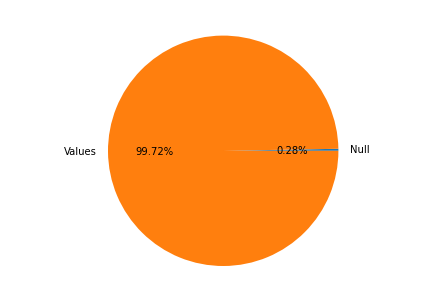

In [71]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie([np.sum(train_data.Embarked.isnull()),train_data.Embarked.count()-np.sum(train_data.Age.isnull())],labels=['Null','Values'],autopct='%1.2f%%')

In [72]:
train_data=train_data.drop(columns=['PassengerId','Name','Ticket','Embarked'],axis=0)

# **Pclass**

In [73]:
np.unique(train_data.Pclass)

array([1, 2, 3])

In [74]:
np.sum(train_data.Pclass.isnull())

0

> No Null Values in Pclass



# **Sex**

In [75]:
np.sum(train_data.Sex.isnull())

0

In [76]:
train_data.Sex=train_data['Sex'].map({'male' : '1' , 'female': '0'})

In [77]:
pd.pivot_table(train_data,values='Survived',index=['Sex'])

,Survived
Sex,
0,0.742038
1,0.188908


# **Age**

([<matplotlib.patches.Wedge at 0x7fd9b9f2ccf8>,
 [Text(0.7829340642350089, 0.7726669729323566, 'null'),
  Text(-0.7829341004061598, -0.7726669362805668, 'values')],
 [Text(0.4270549441281866, 0.4214547125085581, '24.79%'),
  Text(-0.4270549638579053, -0.4214546925166728, '75.21%')])

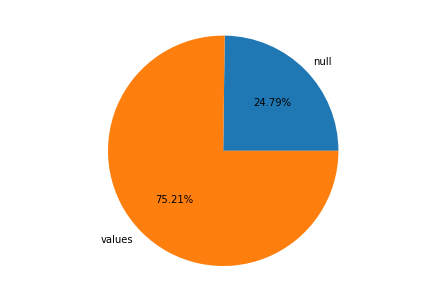

In [78]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie([np.sum(train_data.Age.isnull()),train_data.Age.count()-np.sum(train_data.Age.isnull())],labels=['null','values'],autopct='%1.2f%%')

In [79]:
np.sum(train_data.Age.isnull())

177

In [80]:
train_data.Age=train_data.Age.fillna(np.mean(train_data.Age))

# **Parch**

In [81]:
np.unique(train_data.Parch)

array([0, 1, 2, 3, 4, 5, 6])

In [82]:
np.sum(train_data.Parch.isnull())

0

In [83]:
pd.pivot_table(train_data, values='Survived', index=['Sex','Parch'])

Survived
Sex Parch          
0   0      0.788660
    1      0.766667
    2      0.612245
    3      0.750000
    4      0.000000
    5      0.250000
    6      0.000000
1   0      0.165289
    1      0.327586
    2      0.322581
    3      0.000000
    4      0.000000
    5      0.000000

> No Null values

# **Fare**

In [84]:
np.sum(train_data.Fare.isnull())

0

> No Null values

# **Cabin**

([<matplotlib.patches.Wedge at 0x7fd9ba608550>,
 [Text(-0.8275031118894706, 0.7247334681199997, 'Null'),
  Text(0.8275031118894708, -0.7247334681199993, 'Values')],
 [Text(-0.451365333757893, 0.3953091644290907, '77.10%'),
  Text(0.4513653337578931, -0.3953091644290905, '22.90%')])

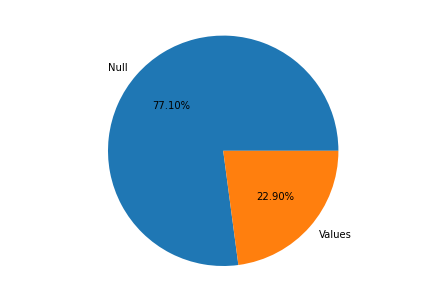

In [85]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie([np.sum(train_data.Cabin.isnull()),train_data.Cabin.count()-np.sum(train_data.Age.isnull())],labels=['Null','Values'],autopct='%1.2f%%')

In [86]:
train_data.Cabin=train_data.Cabin.fillna('Na')

In [87]:
train_data.Cabin=train_data.Cabin.apply(lambda x: x[0])

In [88]:
np.unique(train_data.Cabin)

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'N', 'T'], dtype=object)

In [89]:
train_data.Cabin=train_data.Cabin.apply(lambda x : np.where(np.unique(train_data.Cabin)==x)[0][0].astype('int'))

In [90]:
keys=np.array(train_data.Cabin.value_counts().keys())
vals=np.array(train_data.Cabin.value_counts())

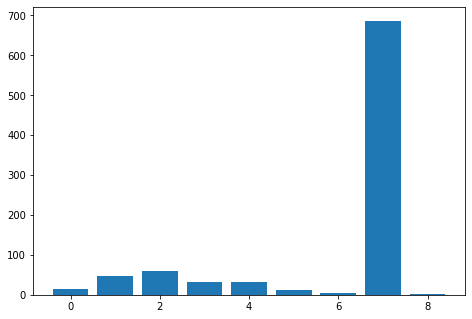

In [91]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(keys,vals)
plt.show()

In [92]:
pd.pivot_table(train_data, values='Survived', index=['Sex','Cabin'])

Survived
Sex Cabin          
0   0      1.000000
    1      1.000000
    2      0.888889
    3      1.000000
    4      0.933333
    5      1.000000
    6      0.500000
    7      0.654378
1   0      0.428571
    1      0.400000
    2      0.343750
    3      0.466667
    4      0.588235
    5      0.375000
    7      0.136170
    8      0.000000

In [93]:
target=train_data['Survived']

In [94]:
train_data=train_data.drop(columns='Survived',axis=1)

In [95]:
train_data.describe()

,Pclass,Age,SibSp,Parch,Fare,Cabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,5.946128
std,0.836071,13.002015,1.102743,0.806057,49.693429,2.062347
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400,7.000000
50%,3.000000,29.699118,0.000000,0.000000,14.454200,7.000000
75%,3.000000,35.000000,1.000000,0.000000,31.000000,7.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,8.000000


# **Test Data Manipulation**

In [197]:
test_data=pd.read_csv('/content/test.csv')

In [199]:
def data_manipulation(train_data):
  mean=np.mean(train_data.Age)
  train_data.Age=train_data.Age.fillna(mean)
  train_data=train_data.drop(columns=['PassengerId','Name','Ticket','Embarked'],axis=0)
  train_data.Sex=train_data['Sex'].map({'male' : '1' , 'female': '0'})
  train_data.Cabin=train_data.Cabin.fillna('Na')
  train_data.Cabin=train_data.Cabin.apply(lambda x: x[0])
  train_data.Cabin=train_data.Cabin.apply(lambda x : np.where(np.unique(train_data.Cabin)==x)[0][0].astype('int'))
  train_data.Fare=train_data.Fare.fillna(np.mean(train_data.Fare,axis=0))
  sc=StandardScaler()
  train_data=sc.fit_transform(train_data)
  return train_data

In [200]:
test_data=data_manipulation(test_data)

# **Model Making**

In [201]:
sc=StandardScaler()
train_data=sc.fit_transform(train_data)

> Using Early stopping in RandomForestClassifier

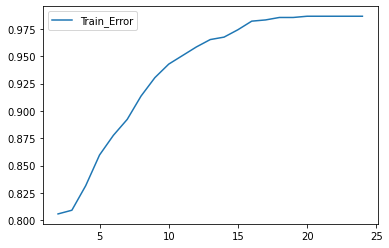

In [202]:
depths=[]
score=[]
for depth in range(2,25):
  rfc=RandomForestClassifier(n_estimators=100,bootstrap=True,oob_score=False,random_state=42,max_depth=depth)
  rfc.fit(train_data,target.ravel())
  depths.append(depth)
  score.append(rfc.score(train_data,target.ravel()))
plt.plot(depths,score1,label='Train_Error')
plt.legend()
plt.show()

> From this we can say that Random forest Classifier with max_depth 5 is generalising more

In [246]:
rfc=RandomForestClassifier(n_estimators=100,bootstrap=True,oob_score=False,random_state=42,max_depth=15)

In [247]:
rfc.fit(train_data,target.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

> Voting Classifier Classifies the data easily when compared to normal classifier because its an ensemble classifier which takes the votes of more than one classifier to decide which is best

In [248]:
lr=LogisticRegression()

In [249]:
lr.fit(train_data,target.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [250]:
lr.score(train_data,target.ravel())

0.7968574635241302

In [251]:
svm=SVC(probability=True)

In [252]:
svm.fit(train_data,target.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [253]:
svm.score(train_data,target.ravel())

0.835016835016835

# **Final Model**

In [254]:
vc=VotingClassifier(estimators=[('lr',lr),('svc',svm),('rf',rfc)],voting='soft')

In [255]:
vc.estimators

[('lr',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('svc',
  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
      verbose=False)),
 ('rf',
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=15, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                  

In [256]:
vc.fit(train_data,target.ravel())

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('svc',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  d...
                                                     criterion='gini',
    

In [257]:
vc.score(train_data,target.ravel())

0.8742985409652076

# **Result**

In [258]:
y_train_pred=vc.predict(train_data)

In [259]:
vc.score(train_data,target.ravel())

0.8742985409652076

In [260]:
confusion_matrix(target.ravel(),y_train_pred)

array([[509,  40],
       [ 72, 270]])

In [261]:
y_pred=vc.predict(test_data)

In [262]:
y_pred.shape

(418,)

In [263]:
y_final=np.array([[i,y_pred[i-892]] for i in range(892,1310)])

In [264]:
y_pred=pd.DataFrame(y_final,columns=['PassengerId','Survived'])

In [266]:
y_pred.to_csv('submission.csv',index=False)

In [267]:
y_pred

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
